In [ ]:
!unzip test_set.zip

In [2]:
import glob
import cv2
from matplotlib import pyplot as plt
import numpy as np

ALTURA = 50
LARGURA = 50

cats = [cv2.imread(file) for file in glob.glob("dados/test_set/cats/*.jpg")]
cats = [cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY) for cat in cats]
cats = np.array([cv2.resize(cat, (ALTURA, LARGURA)) for cat in cats])
data_cats = np.append(cats.reshape(len(cats), ALTURA * LARGURA), np.full((len(cats), 1), 0), axis=1)

dogs = [cv2.imread(file) for file in glob.glob("dados/test_set/dogs/*.jpg")]
dogs = [cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY) for dog in dogs]
dogs = np.array([cv2.resize(dog, (ALTURA, LARGURA)) for dog in dogs])
data_dogs = np.append(dogs.reshape(len(dogs), ALTURA * LARGURA), np.full((len(dogs), 1), 1), axis=1)

data = np.append(data_cats, data_dogs, axis=0)
data = np.random.permutation(data)

In [3]:
from sklearn.model_selection import train_test_split

X = data[:, :-1]
y = data[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=2/3, random_state=1)

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

model = MLPClassifier(hidden_layer_sizes=(500), max_iter=500, 
                      learning_rate_init=0.001, random_state=1, verbose=True)

model.fit(X_train, y_train)

accuracy_score(y_test, model.predict(X_test))

Iteration 1, loss = inf
Iteration 2, loss = inf
Iteration 3, loss = inf
Iteration 4, loss = inf
Iteration 5, loss = 12.68100496
Iteration 6, loss = 5.63100397
Iteration 7, loss = 4.32913709
Iteration 8, loss = 3.23130305
Iteration 9, loss = 1.78789483
Iteration 10, loss = 2.03875431
Iteration 11, loss = 1.40679903
Iteration 12, loss = 1.18831044
Iteration 13, loss = 0.91752083
Iteration 14, loss = 0.73424435
Iteration 15, loss = 0.67923355
Iteration 16, loss = 0.88150726
Iteration 17, loss = 0.68059552
Iteration 18, loss = 0.61449469
Iteration 19, loss = 0.71579160
Iteration 20, loss = 0.73157733
Iteration 21, loss = 0.79335388
Iteration 22, loss = 1.07206429
Iteration 23, loss = 0.85512851
Iteration 24, loss = 0.82011755
Iteration 25, loss = 0.84974801
Iteration 26, loss = 0.72916687
Iteration 27, loss = 0.54061631
Iteration 28, loss = 0.49351258
Iteration 29, loss = 0.46717521
Iteration 30, loss = 0.44792250
Iteration 31, loss = 0.42716758
Iteration 32, loss = 0.41578773
Iteration 33

0.5081481481481481

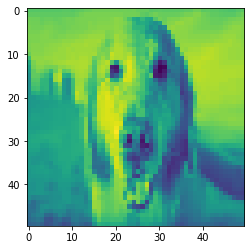

In [7]:
auau = cv2.imread('auau.jpeg')
auau = cv2.cvtColor(auau, cv2.COLOR_BGR2GRAY)
auau = cv2.resize(auau, (ALTURA, LARGURA))
plt.imshow(auau) 

In [14]:
model.predict(auau.reshape(1, ALTURA * LARGURA))

array([0])

In [ ]:
len(data)